<a href="https://colab.research.google.com/github/julesberhault/Daurade/blob/main/TP_Geolocalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Géolocalisation

## Jules Berhault FISE 2021

## Partie 1 : Présentation de la bibliothèque pyProj

In [184]:
!pip3 install pyproj

import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    DATASET_PATH = '/content/drive/My Drive/Colab Notebooks/'
else:
    IN_COLAB = False
    DATASET_PATH = r'./'

# Import de la librairie pyproj
import pyproj as prj
import matplotlib.pyplot as plt
import numpy as np
# Projection RGF93 / Lambert93 utilisée en France (EPSG:2154)
p = prj.Proj("epsg:2154")
# Calcul des coordonnées en projection pour le point (-2°, 48°)
E, N = p(-2,48)
# L'option inverse=True permet de réaliser la transformation inverse
lon,lat = p(E,N,inverse=True)

## 1. La classe Proj

In [185]:
# Projection de Mercator avec origine à l'équateur
p = prj.Proj(proj='merc',ellps='WGS84', lat_ts=0)
# Projection UTM zone 10
p = prj.Proj(proj='utm',zone=30,ellps='WGS84')

### a) Rechercher le code EPSG du SRC WGS84/UTM zone 30N.Déterminer les coordonnées en projection dans ce SRC du point de coordonnées géographiques (-4.7334,48.4180).

In [186]:
p = prj.Proj("epsg:32630")

x,y = p(-4.7334,48.4180)

print('x = %9.3f y = %11.3f' % (x,y))
print('lon = %8.3f lat = %5.3f' % p(x,y,inverse=True))

x = 371746.446 y = 5364212.275
lon =   -4.733 lat = 48.418


### b) En définissant manuellement la projection, déterminer les coordonnées en projection en UTM zone 30 et UTM zone 31 du point de coordonnées géographiques (-4.7334,48.4180).

In [187]:
p = prj.Proj("epsg:32631")

x,y = p(-4.7334,48.4180)

print('x = %9.3f y = %11.3f' % (x,y))
print('lon = %8.3f lat = %5.3f' % p(x,y,inverse=True))

x = -71991.794 y = 5391718.375
lon =   -4.733 lat = 48.418


### c) Toujours en dénissant manuellement la projection, déterminer les coordonnées en projection Mercator pour diérentes latitude d'origine (0°, 25°, 50°) du point de coordonnées géographiques (-4.7334°, 48.4180°) avec l'ellipsoïde GRS80.

In [188]:
lon_origin = [0.0, 0.0, 0.0]
lat_origin = [0.0, 25.0, 50.0]
lon = [-4.7334 - l for l in lon_origin]
lat = [48.4180 - l for l in lat_origin]

p = prj.Proj("epsg:32630")

x,y = p(lon, lat)

print("lon_origin = ", lon_origin)
print("lat_origin = ", lat_origin)
print("x = ", x)
print("y = ", y)

lon_origin =  [0.0, 0.0, 0.0]
lat_origin =  [0.0, 25.0, 50.0]
x =  [371746.445868467, 322891.6078864513, 307159.43491298263]
y =  [5364212.274512298, 2590858.4523919825, -174939.530680269]


### d) On utilise à nouveau les SRC WGS 84 / UTM zone 30N et WGS 84 / UTM zone 31N.

#### i. Pour une latitude de 48°, en faisant varier la longitude de -6 à 0° par pas de 0,1°, tracer la convergence des méridiens et l'échelle selon le méridien pour chacun des 2 SRC.

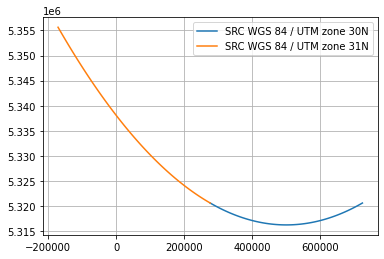

In [189]:
lon = []
lat = []
for i in np.arange(-6.0, 0.1, 0.1):
  lon.append(i)
  lat.append(48.0)

p30N = prj.Proj("epsg:32630")
p31N = prj.Proj("epsg:32631")

x0,y0 = p30N(lon, lat)
x1,y1 = p31N(lon, lat)

plt.plot(x0, y0)
plt.plot(x1, y1)
plt.grid()
plt.legend(['SRC WGS 84 / UTM zone 30N', 'SRC WGS 84 / UTM zone 31N'])
plt.show()

#### ii. Pour une longitude de -3°, en faisant varier la latitude de 40 à 50° par pas de 0,1°, tracer la convergence des méridiens et l'échelle selon le méridien pour chacun des 2 SRC

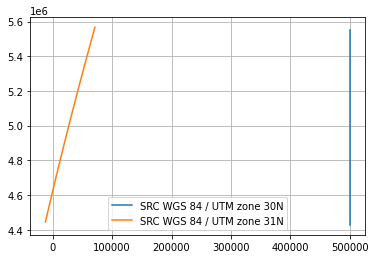

In [190]:
lon = []
lat = []
for i in np.arange(40.0, 50.1, 0.1):
  lon.append(-3.0)
  lat.append(i)

p30N = prj.Proj("epsg:32630")
p31N = prj.Proj("epsg:32631")

x0,y0 = p30N(lon, lat)
x1,y1 = p31N(lon, lat)

plt.plot(x0, y0)
plt.plot(x1, y1)
plt.grid()
plt.legend(['SRC WGS 84 / UTM zone 30N', 'SRC WGS 84 / UTM zone 31N'])
plt.show()

## 2. La classe CRS

### a) Calculer les coordonnées en RGF93 / Lambert 93 du point de coordonnées géographiques -4.7334°, 48.4180° dans le repère WGS84.

In [191]:
p = prj.Proj("epsg:2154")

x,y = p(-4.7334,48.4180)

print('x = %9.3f y = %11.3f' % (x,y))
print('lon = %8.3f lat = %5.3f' % p(x,y,inverse=True))

x = 128710.265 y = 6841077.066
lon =   -4.733 lat = 48.418


### b) En s'inspirant de la documentation de la projection de Mercator sur le site de la librairie PROJ ( https://proj.org/operations/projections/merc.html ) calculer les coordonnées en projection du point précédent pour les paramètres suivant de la projection de Mercator dans le repère WGS84 :
- Latitude d'échelle unitaire : 48,5 ◦
- Coordonnées de l'origine : E 0 = 400 km et N 0 = 0 km.

In [192]:
rgf93_merc = prj.CRS(proj='merc',ellps='GRS80', lat_ts = 48.5)

x,y = p(-4.7334,48.4180)
x = x - 400000

print('x = %9.3f y = %11.3f' % (x,y))

x = -271289.735 y = 6841077.066


## Partie 2 : Application : Trajectographie GNSS à Guerlédan

### 1. Rappeler les caractéristiques de chaque mode de détermination.

- Le GNSS standard est la méthode classique, brut, offrant les information de géolocalisation directement depuis le récépteur GNSS.

- Le GNSS différentiel ou DGNSS est une amélioration du GPS permettant de passer d'une précision de 15 mètres à 1-3 cm avec les meilleurs implémentations1. Il utilise un réseau de stations fixes de référence qui transmet l’écart entre les positions indiquées par les satellites et leurs positions réelles connues. En fait le récepteur reçoit la différence entre les pseudo-distances mesurées par les satellites et les véritables pseudo-distances et peut ainsi corriger ses mesures de positions.

- La Cinématique temps réel ou RTK est une technique de positionnement par satellite basée sur l'utilisation de mesures de la phase des ondes porteuses des signaux émis par les systèmes GNSS. Une station de référence fournit des corrections en temps réel permettant d'atteindre une précision de l'ordre du centimètre. 

- La cinématique post-traitée ou PPK :
Le principe est le même pour le RTK mais la donnée de correction n’est pas transmise en direct, elle est stockée dans un fichier au format Rinex sur la base.

### 2. Exprimée les trajectographies en coordonnées en projection Lambert93 dans le repère RGF93.

In [193]:
from google.colab import drive
drive.mount("/content/drive")

GNSS_PATH = DATASET_PATH+'data/spp.llh'
DGNSS_PATH = DATASET_PATH+'data/dgnss.llh'
RTK_PATH = DATASET_PATH+'data/rtk.llh'
PPK_PATH = DATASET_PATH+'data/ppk.llh'

GNSS = np.loadtxt(GNSS_PATH)
DGNSS = np.loadtxt(DGNSS_PATH)
RTK = np.loadtxt(RTK_PATH)
PPK = np.loadtxt(PPK_PATH)

lonGNSS = GNSS[:,6]
latGNSS = GNSS[:,7]

lonDGNSS = DGNSS[:,6]
latDGNSS = DGNSS[:,7]

lonRTK = RTK[:,6]
latRTK = RTK[:,7]

lonPPK = PPK[:,6]
latPPK = PPK[:,7]

p = prj.Proj("epsg:2154")

xGNSS,yGNSS = p(lonGNSS, latGNSS)
xDGNSS,yDGNSS = p(lonDGNSS, latDGNSS)
xRTK,yRTK = p(lonRTK, latRTK)
xPPK,yPPK = p(lonPPK, latPPK)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


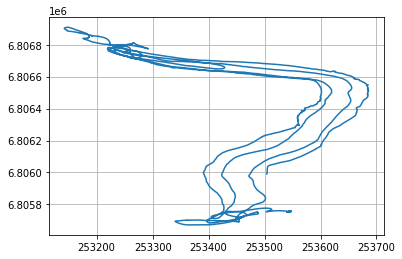

In [194]:
plt.plot(xGNSS, yGNSS)
plt.grid()
#plt.legend(['GNSS'])
plt.show()

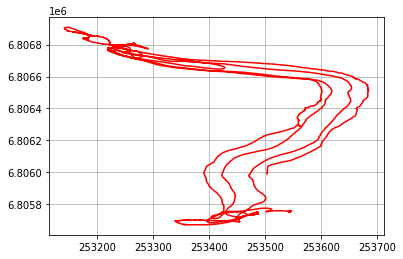

In [195]:
plt.plot(xDGNSS, yDGNSS,'r')
plt.grid()
#plt.legend(['DGNSS'])
plt.show()

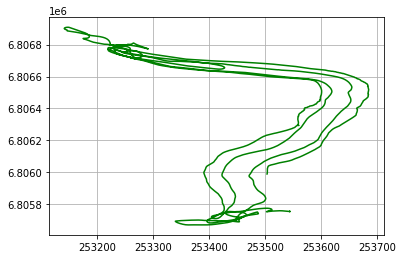

In [196]:
plt.plot(xPPK, yPPK,'g')
plt.grid()
#plt.legend(['RTK'])
plt.show()

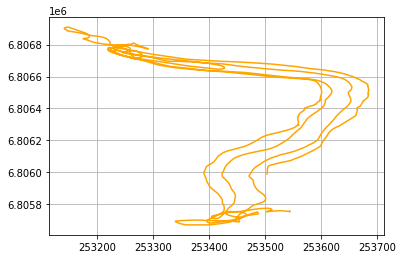

In [197]:
plt.plot(xPPK, yPPK,'orange')
plt.grid()
#plt.legend(['PPK'])
plt.show()

### 3. Comparer les diérentes trajectographies et commenter les écarts au vu des incertitudes associées aux diérents modes de positionnement.

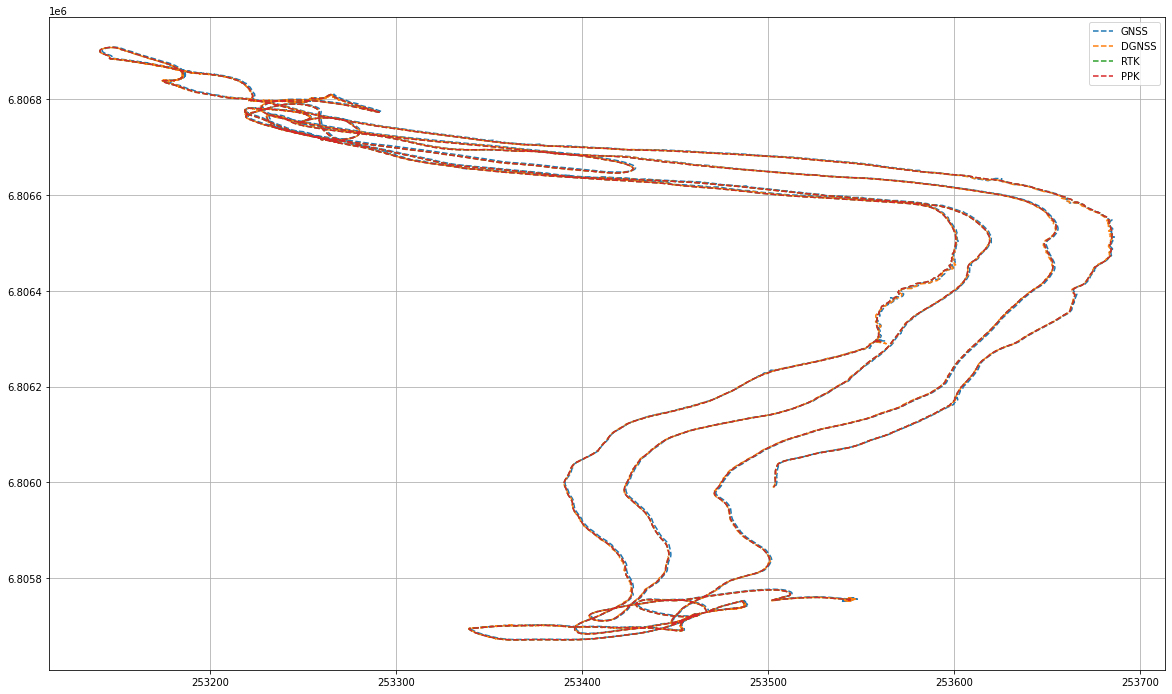

In [198]:
fig = plt.figure(1, figsize=(20, 12))
plt.plot(xGNSS, yGNSS, '--')
plt.plot(xDGNSS, yDGNSS, '--')
plt.plot(xPPK, yPPK, '--')
plt.plot(xPPK, yPPK, '--')
plt.grid()
plt.legend(['GNSS','DGNSS','RTK','PPK'])
plt.show()

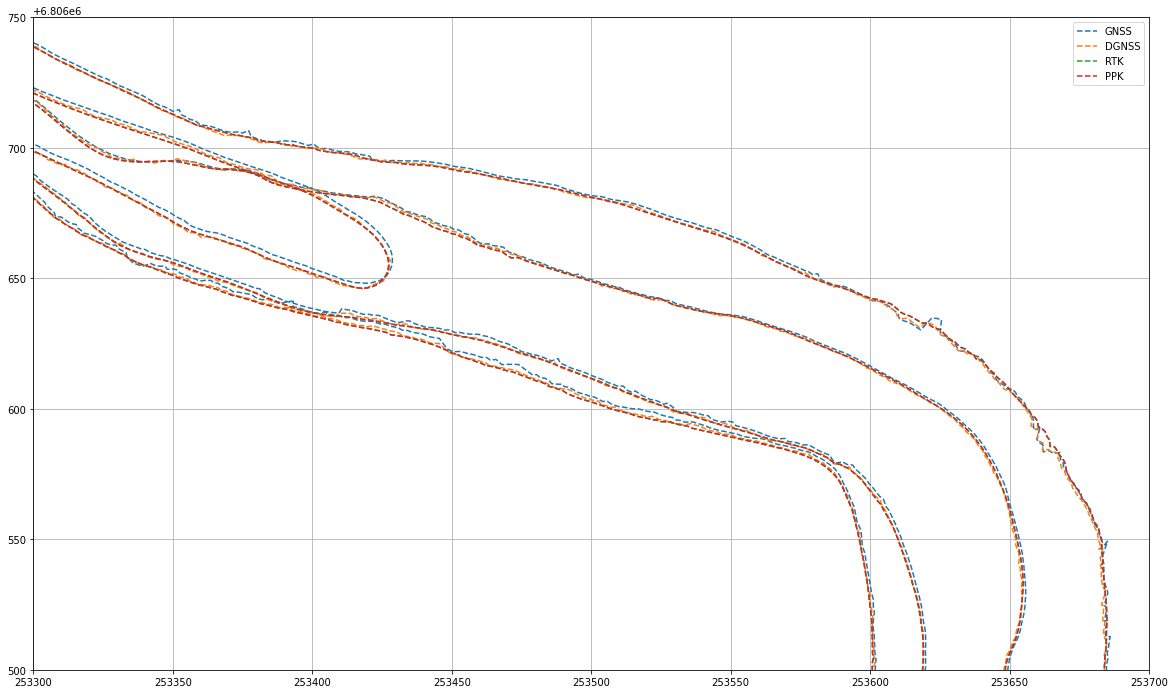

In [199]:
fig = plt.figure(1, figsize=(20, 12))
plt.plot(xGNSS, yGNSS, '--')
plt.plot(xDGNSS, yDGNSS, '--')
plt.plot(xPPK, yPPK, '--')
plt.plot(xPPK, yPPK, '--')
plt.grid()
plt.xlim((253300,253700))
plt.ylim((6806500,6806750))
plt.legend(['GNSS','DGNSS','RTK','PPK'])
plt.show()

On remarque que les écarts des différentes méthodes de traitement des données sont globalement assez faibles mais non négligeables.
En effet on atteint différents niveaux de précision, des courbes plus ou moins nettes et lisses en fonction de la méthode utilisé. Ces écarts certes faibles à grande échelle on une importance dans la précision des calculs à venir.
On en déduit ainsi que les méthodes traitées tels que RTK et PPK semble offrir d'avantage de précision que la solution standard GNSS avec des resultats plus stables comme on peu l'observer sur la figure ci-dessus.